# Get physio data #

Let's start by adding the necessary packages. This is not yet an official python package, so the pycequeau folder need to be added using the next code block:

In [ ]:
import os
from pycequeau import physiographic, meteo
import matplotlib.pyplot as plt

Before start using the toolbox, you need to set up the working directory project. To do so, we need to run this code lines and the toolbox will create the project folder structure as follows:

```
Project/
|-- geographic/
|-- meteo/
|-- results/
```


In [ ]:
project_folder = r"path/to/your/project/"
files_list = ["BurnedDEM.tif", # DEM tif file
                "FAC.tif", #Flow accumulation tif file
                "LCF.tif", # Land conver tif file
                "Watershed.tif", # Watershed tif file
                "CAT.tif" #Sub basins tif file
                ]

# 2- Create basin Object:
basin = physiographic.Basin(project_folder,
                "Margarite",
                files_list)


In this point, you need to place all the files contained in the list `files_list` into the `geographic` folder. It is very straight forward to use the toolbox by running the next chain of instructions. 

In [17]:
# 3 - Select Fisnet dimensions. This dimenssions are given in m
basin.set_dimensions(1500, 1500)

In [18]:
# 4 - Create CE and CP fishnet
basin.create_CEfishnet()
basin.create_CPfishnet()

c:\Users\erinc\anaconda3\envs\test_pycequeau\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 2121520258.4987414 of field area of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\erinc\anaconda3\envs\test_pycequeau\lib\site-packages\geopandas\tools\overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 53 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


In [19]:
# 5 - Remove the small CPs in the basin
basin.polish_CPfishnet()

In [20]:
# 6 - Do the routing process
basin.CP_routing()

c:\Users\erinc\anaconda3\envs\test_pycequeau\lib\site-packages\geopandas\geodataframe.py:257: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)
c:\Users\erinc\anaconda3\envs\test_pycequeau\lib\site-packages\pycequeau\physiographic\base.py:517: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  self.CPfishnet.to_file(self._CPfishnet)
c:\Users\erinc\anaconda3\envs\test_pycequeau\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'cumulPctSurf' to 'cumulPctSu'
  ogr_write(


> **_NOTE:_** If you wish to compute the mean slope in each CE, you need to provide the `Slope.tif` file in the `geographic` folder before executing the following lines. The slope can be compute either using QGIS or GRASS-GIS. If you do not need this, ignore this NOTE



In [21]:
# 7 - Create the carreaux entiers structure
basin.carreauxEntiers_struct()

In [22]:
# 8 - Create carreux partiels structure
basin.carreauxPartiels_struct()

c:\Users\erinc\anaconda3\envs\test_pycequeau\lib\site-packages\pycequeau\physiographic\carreauxPartiels.py:148: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CP1 to CP0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_line.loc[i, "names"] = f"CP{i} to CP{cp_aval}"
c:\Users\erinc\anaconda3\envs\test_pycequeau\lib\site-packages\pycequeau\physiographic\carreauxPartiels.py:198: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gpdf_line.to_file(streams_file)
c:\Users\erinc\anaconda3\envs\test_pycequeau\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'azimutCoursEau' to 'azimutCour'
  ogr_write(
c:\Users\erinc\anaconda3\envs\test_pycequeau\lib\site-packages\pycequeau\physiographic\base.py:815: UserWarning: Column names longer than 10 characters will be truncated when saved t

In [23]:
# 8 - Create the bassinVersant structure
basin.create_bassinVersant_structure()

Now, let's graph some of the obtained results. First, we will plot the CE fishnet renumbered with the correct CE id

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
CE_fishnet = gpd.read_file(os.path.join(project_folder,"geographic","CE_fishnet.shp"))
CE_fishnet.head()

,CEid,newCEid,altitude,i,j,geometry
0,1558,1,120.53025,48,12,"POLYGON ((428986.989 5347816.221, 430473.475 5..."
1,1557,2,253.60094674556214,48,13,"POLYGON ((428986.989 5349302.707, 430473.475 5..."
2,1598,3,56.58417159763314,49,12,"POLYGON ((430473.475 5347816.221, 431959.961 5..."
3,1517,4,250.0989349112426,47,13,"POLYGON ((427500.504 5349302.707, 428986.989 5..."
4,1638,5,76.2698298816568,50,12,"POLYGON ((431959.961 5347816.221, 433446.447 5..."


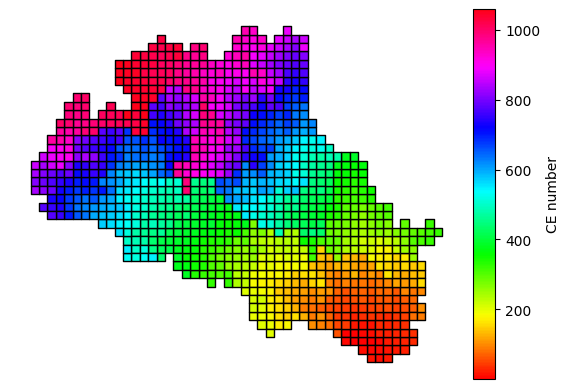

In [25]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# Axis
CE_fishnet.plot(column='newCEid', cmap='hsv', ax=ax, legend=True, cax=cax,
                legend_kwds={'label': "CE number",
                        'orientation': "vertical"},
                edgecolor='black')
ax.set_axis_off();

Now, let's do the same with the CP fishnet

In [26]:
CP_fishnet = gpd.read_file(os.path.join(project_folder,"geographic","CP_fishnet.shp"))
CP_fishnet.head()

,CEid,raster_val,validity,CATid,Area,Dissolve,maxFAC,CPid,newCPid,newCEid,pctSurface,cumulPctSu,cumulArea,altitude,x_c,y_c,i,j,geometry
0,1558,310.0,Valid Geometry,9.0,1.765097e+06,0,4055492.0,1332,1,1,79.881657,95906.958580,2119.198698,120.53025,429836.425875,5.347181e+06,48,12,"POLYGON ((430473.475 5347816.221, 430473.475 5..."
1,1557,308.0,Valid Geometry,1.0,1.396388e+05,0,1297.0,1295,2,2,6.319527,40.236686,0.889086,265.0936329588015,429277.391622,5.347933e+06,48,13,"POLYGON ((428986.989 5347816.221, 428986.989 5..."
2,1598,388.0,Valid Geometry,3.0,1.422538e+06,0,4049534.0,1363,3,3,64.378698,95771.266272,2116.200386,51.55072954963235,431047.739728,5.346993e+06,49,12,"POLYGON ((430976.594 5347770.483, 430953.725 5..."
3,1517,308.0,Valid Geometry,1.0,4.429740e+05,0,1254.0,1293,4,4,20.047337,33.917160,0.749447,270.6304604486423,428575.981681,5.348134e+06,47,13,"POLYGON ((428986.989 5347816.221, 428369.526 5..."
4,1638,388.0,Valid Geometry,9.0,2.209640e+06,0,2146573.0,1371,5,5,100.000000,50777.704142,1122.004556,76.2698298816568,432703.204045,5.347073e+06,50,12,"POLYGON ((431959.961 5347038.674, 431959.961 5..."


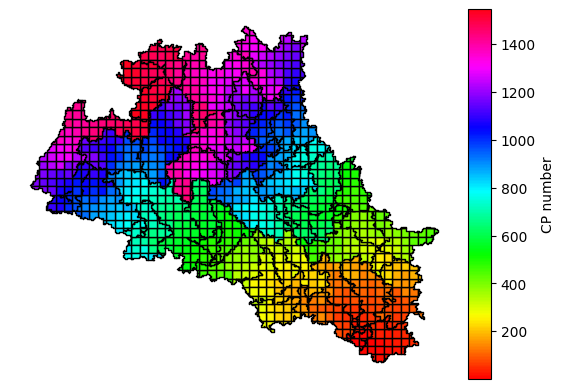

In [27]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
CP_fishnet.plot(column='newCPid', cmap='hsv', ax=ax, legend=True, cax=cax,
                legend_kwds={'label': "CP number",
                        'orientation': "vertical"},
                edgecolor='black')
ax.set_axis_off();

If you want to see the flow structure of your basin, run the folowing instruction:

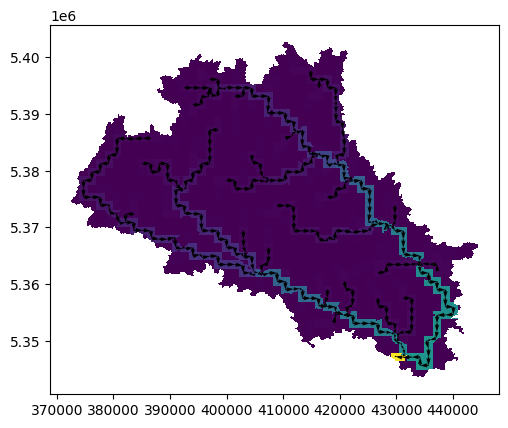

In [28]:
basin.plot_routing()

The bassinVersant strcuture is saved as a `.json` file that contains all the information to make the CEQUEAU model run in the Matlab environment. The translation routines of the `.json` file to Matlab structure can be found [here](https://github.com/erinconv/pycequeau/tree/main/matlab)